In [156]:
from preprocess import *
from data import *
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [157]:
sample_image='/home/carnd/Dropbox/udacity-data/track1/recover_drive/IMG/center_2017_02_21_22_40_07_521.jpg'

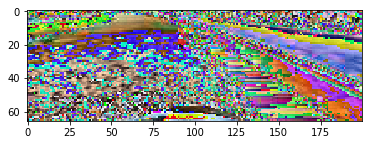

In [158]:
img = cv2.imread(sample_image)
img=preprocess_image(img)
plt.imshow(img)

In [159]:
df = return_track1_dataframe(track1_data_dirs = ['data_download'])

def autocorr(x, t=1):
    return np.corrcoef(np.array([x[0:len(x)-t], x[t:len(x)]]))
    
sum(df['steering'].diff() > 0.1)

365

In [160]:
from pandas import DataFrame, Series

size_filter = df['steering'].abs().diff() < 0.1
df['groups'] = (~size_filter).cumsum()
df[size_filter][['steering', 'groups']].groupby('groups')['steering'].aggregate(lambda x: (x * x).sum() / len(x)).mean()

0.027357392847842152

['/home/carnd/Dropbox/udacity-data/training/Adam_100_epochs_all_data/stats_epoch_140.csv', '/home/carnd/Dropbox/udacity-data/training/Adam_100_epochs_all_data/stats_epoch_88.csv', '/home/carnd/Dropbox/udacity-data/training/Adam_100_epochs_all_data/stats_epoch_79.csv', '/home/carnd/Dropbox/udacity-data/training/Adam_100_epochs_all_data/stats_epoch_127.csv', '/home/carnd/Dropbox/udacity-data/training/Adam_100_epochs_all_data/stats_epoch_17.csv', '/home/carnd/Dropbox/udacity-data/training/Adam_100_epochs_all_data/stats_epoch_54.csv', '/home/carnd/Dropbox/udacity-data/training/Adam_100_epochs_all_data/stats_epoch_81.csv', '/home/carnd/Dropbox/udacity-data/training/Adam_100_epochs_all_data/stats_epoch_137.csv', '/home/carnd/Dropbox/udacity-data/training/Adam_100_epochs_all_data/stats_epoch_101.csv', '/home/carnd/Dropbox/udacity-data/training/Adam_100_epochs_all_data/stats_epoch_70.csv', '/home/carnd/Dropbox/udacity-data/training/Adam_100_epochs_all_data/stats_epoch_42.csv', '/home/carnd/Dro

EmptyDataError: No columns to parse from file

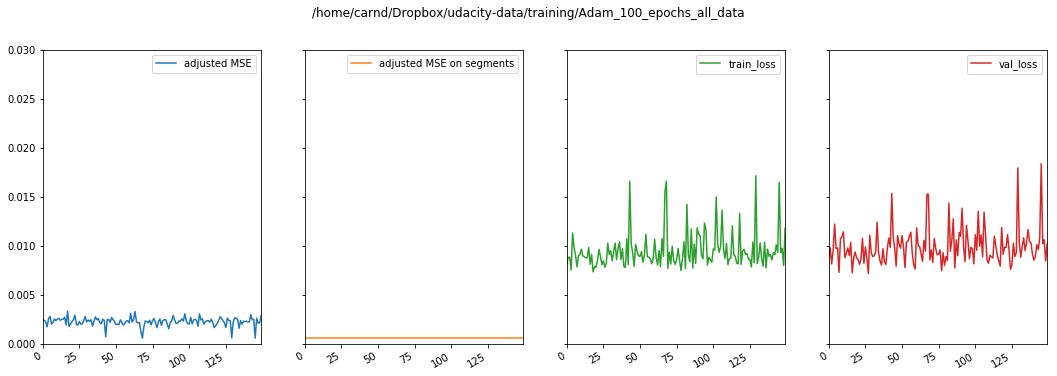

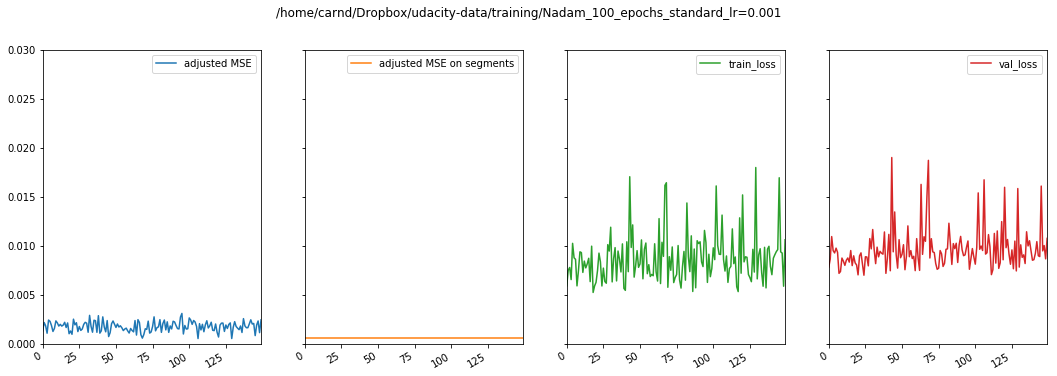

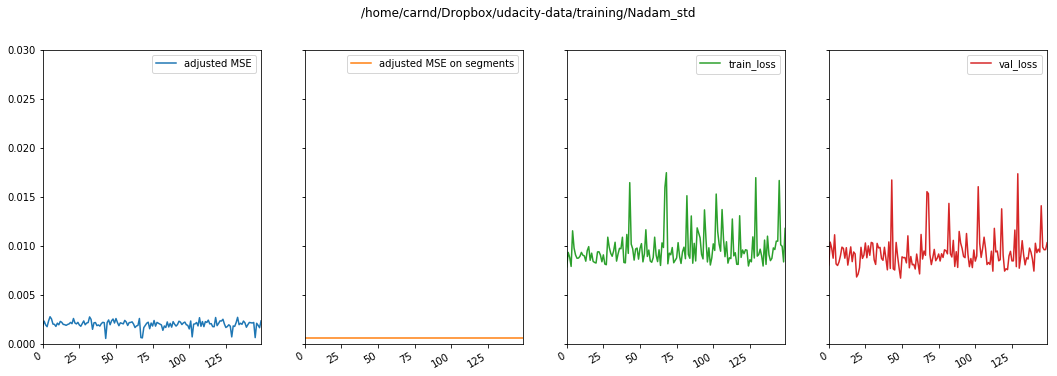

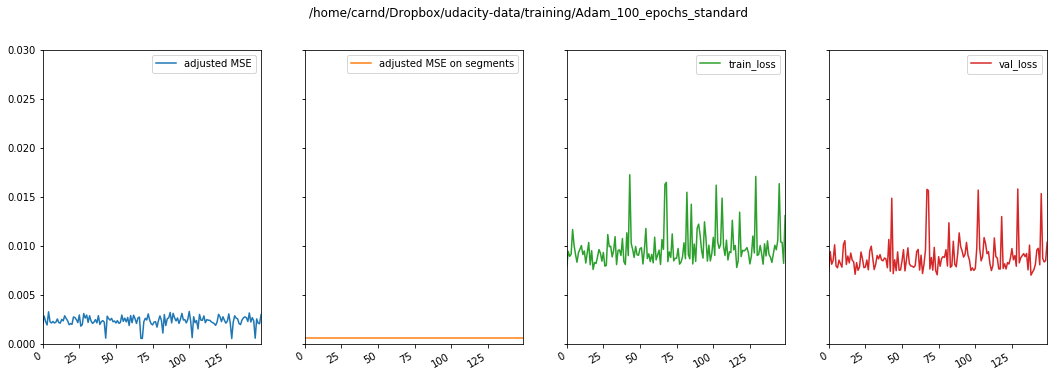

In [163]:
training_dir = '/home/carnd/Dropbox/udacity-data/training'
training_runs = [training_dir + '/' + x for x in os.listdir(training_dir)]

for run in training_runs:
    stats_data_files = [run + '/' + x for x in os.listdir(run) if 'stats' in x]
    print(stats_data_files)
    df = pd.concat([pd.read_csv(x, header=None).pivot_table(index=0).transpose() for x in stats_data_files]).reset_index()
    del df['index']    
    #df['adjusted MSE'].plot(kind='line')
    df.plot(subplots=True, kind='line', layout=(1,4), figsize=(18,6), sharey = True, ylim=(0, 0.03), title=run)
